In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data/sales.csv')

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [15]:
import pandas as pd

# Asegurándote de que las fechas estén en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=True)

# Creando una nueva columna que contiene la diferencia entre la fecha de envío y la fecha de pedido
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Calculando el tiempo promedio de envío
average_shipping_time = df['Shipping Time'].mean()

print("El tiempo promedio de envío es de {} días.".format(average_shipping_time))


El tiempo promedio de envío es de 3.9611224489795918 días.


In [16]:
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'df' es tu DataFrame
grouped = df.groupby(['Region', 'Product Name'])['Sales'].sum().reset_index()

# Crea un DataFrame vacío para almacenar los 10 mejores productos por región
top10_products_per_region = pd.DataFrame()

# Para cada región, selecciona los 10 productos más vendidos
for region in grouped['Region'].unique():
    top_products = grouped[grouped['Region'] == region].nlargest(10, 'Sales')
    top10_products_per_region = pd.concat([top10_products_per_region, top_products])

print(top10_products_per_region)


Note: you may need to restart the kernel to use updated packages.
       Region                                       Product Name      Sales
283   Central              Canon imageCLASS 2200 Advanced Copier  17499.950
695   Central          Lexmark MX611dhe Monochrome Laser Printer  14279.916
631   Central               Ibico EPK-21 Electric Binding System  11339.940
474   Central   GBC Ibimaster 500 Manual ProClick Binding System  10653.720
469   Central          GBC DocuBind P400 Electric Binding System   8710.336
545   Central       HON 5400 Series Task Chairs for Big and Tall   6939.702
441   Central  Fellowes PB500 Electric Punch Plastic Comb Bin...   6100.752
279   Central                 Canon PC1060 Personal Laser Copier   4899.930
766   Central                       Mitel MiVoice 5330e IP Phone   4179.848
732   Central  Martin Yale Chadless Opener Electric Letter Op...   4164.050
1592     East              Canon imageCLASS 2200 Advanced Copier  30099.914
1297     East   3D Sys

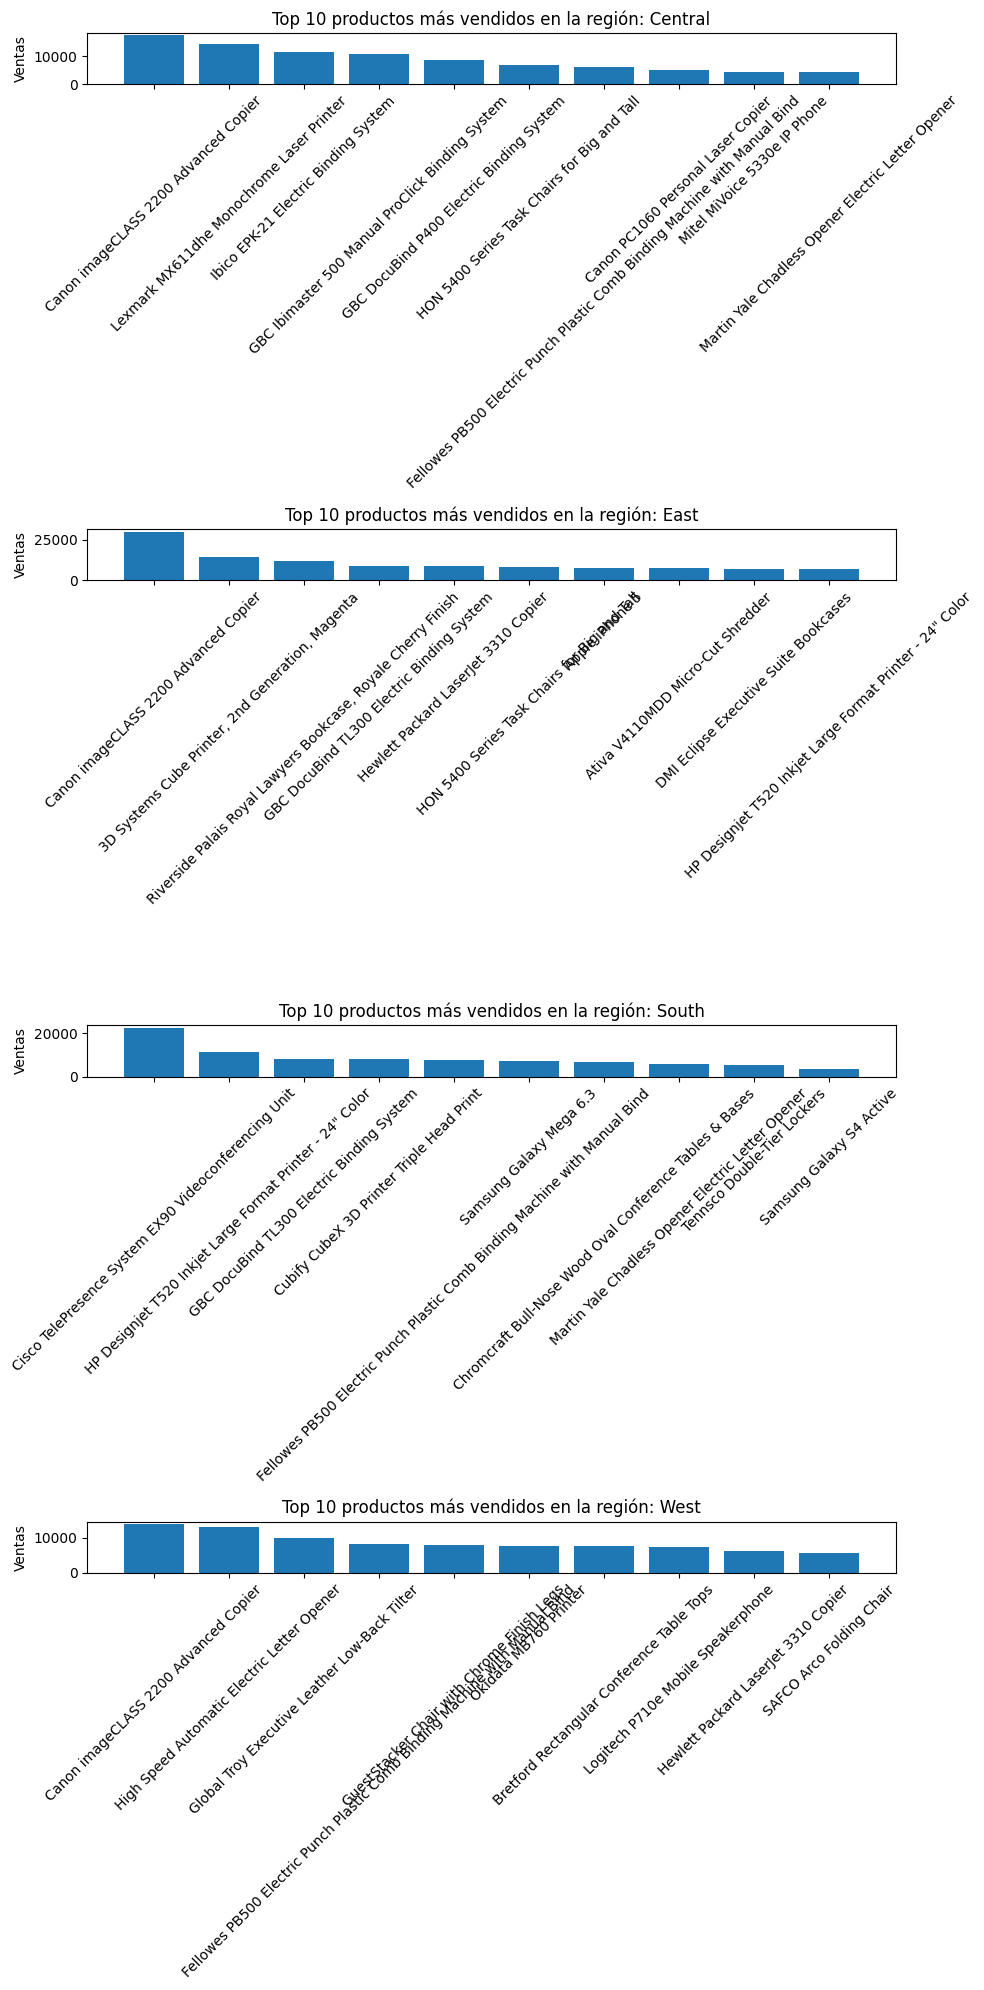

In [17]:
# Crear subgráficos para cada región
fig, axs = plt.subplots(len(grouped['Region'].unique()), 1, figsize=(10, 5*len(grouped['Region'].unique())))

for i, region in enumerate(grouped['Region'].unique()):
    top_products = top10_products_per_region[top10_products_per_region['Region'] == region]
    axs[i].bar(top_products['Product Name'], top_products['Sales'])
    axs[i].set_title('Top 10 productos más vendidos en la región: ' + region)
    axs[i].set_ylabel('Ventas')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()


## Visualizacion

In [18]:
%pip install nbformat
%pip install plotly
import pandas as pd
import plotly.express as px

# Supongamos que tu dataframe se llama df
# Primero necesitamos agregar los datos de ventas tanto para la categoría como para la subcategoría.

# Asegurarse que 'Sales' sea numérico
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

category_sales = df.groupby('Category')['Sales'].sum().reset_index()
sub_category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Ahora vamos a fusionar estos dataframes en uno que tenga la información de las ventas de ambas categorías y subcategorías
merged_df = pd.concat([category_sales, sub_category_sales])

# Filter out non-leaf rows
merged_df = merged_df[merged_df['Sub-Category'].notnull()]

# Crear el diagrama de Sunburst
fig = px.sunburst(merged_df, path=['Category', 'Sub-Category'], values='Sales')
fig.show()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed